In [1]:
import os
import sys 
import time
import pandas as pd
import patchworklib as pw
import numpy as np
from plotnine import *
from plotnine.data import *
t0 = time.time()
quick = True

<Figure size 100x100 with 0 Axes>

CPU times: user 1.28 s, sys: 5.93 ms, total: 1.29 s
Wall time: 1.29 s


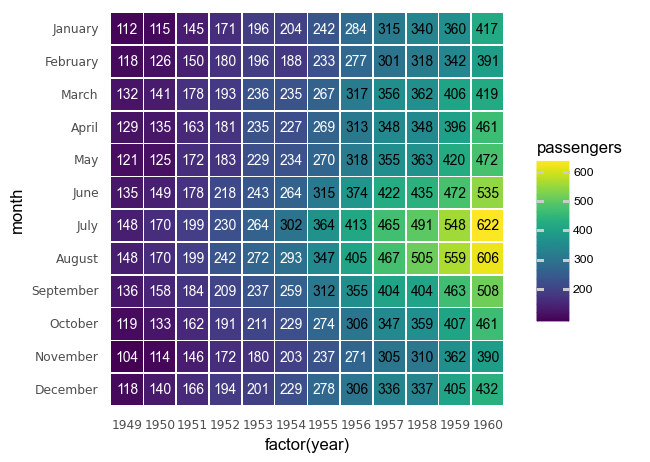

In [2]:
%%time
if "flights.csv" in os.listdir():
    pass
else:
    os.system("wget https://raw.githubusercontent.com/mwaskom/seaborn-data/master/flights.csv")
flights = pd.read_csv('flights.csv')
months = flights['month'].unique()  # Months ordered January, ..., December
flights['month'] = pd.Categorical(flights['month'], categories=months)
flights.head()
text_color = np.array(['black']*len(flights))
text_color[flights['passengers']<300] = 'white'
g = (ggplot(flights, aes('factor(year)', 'month', fill='passengers'))
 + geom_tile(aes(width=.95, height=.95))
 + geom_text(aes(label='passengers'), size=10, color=text_color)
 + scale_y_discrete(limits=months[::-1])          
 + theme(                                         
     axis_ticks=element_blank(),
     panel_background=element_rect(fill='white'))
)
g1 = pw.load_ggplot(g, figsize=(4,4))
g1.savefig(quick=quick)

CPU times: user 866 ms, sys: 338 ms, total: 1.2 s
Wall time: 532 ms


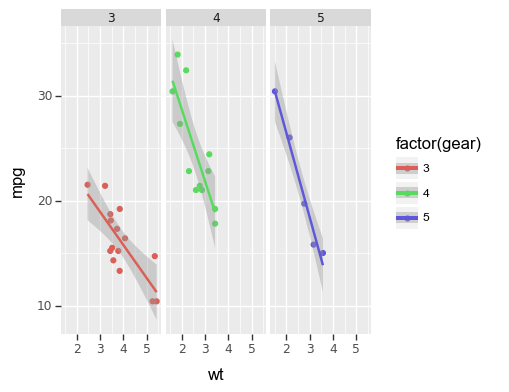

In [3]:
%%time
g = (ggplot(mtcars, aes('wt', 'mpg', color='factor(gear)'))
 + geom_point()
 + stat_smooth(method='lm')
 + facet_wrap('~gear'))
g2 = pw.load_ggplot(g, figsize=(4,4))
g2.savefig(quick=quick)

CPU times: user 471 ms, sys: 3.31 ms, total: 474 ms
Wall time: 472 ms


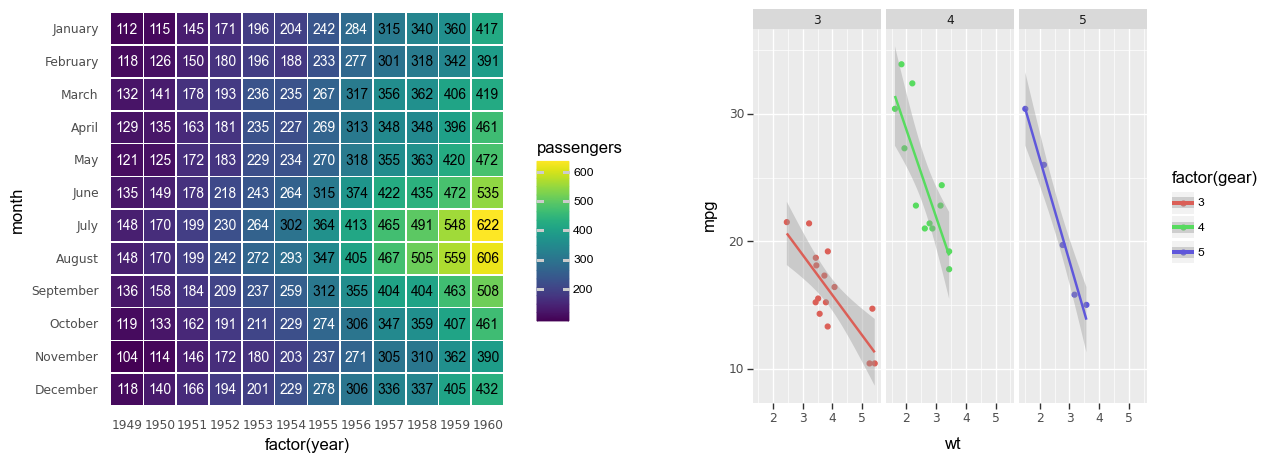

In [4]:
%%time
g12 = (g1.outline|g2.outline)
g12.savefig(quick=quick)

CPU times: user 4.63 s, sys: 265 ms, total: 4.89 s
Wall time: 4.37 s


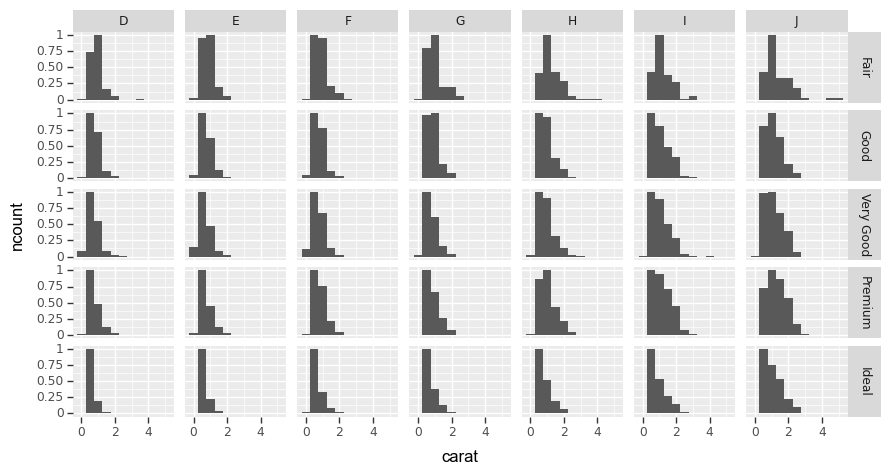

In [5]:
%%time
g = (ggplot(diamonds, aes(x='carat', y=after_stat('ncount'))) 
 + geom_histogram(binwidth=0.5)
 + facet_grid('cut ~ color'))
g3 = pw.load_ggplot(g, figsize=(10,5))
g3.savefig(quick=quick)

CPU times: user 639 ms, sys: 6.47 ms, total: 646 ms
Wall time: 645 ms


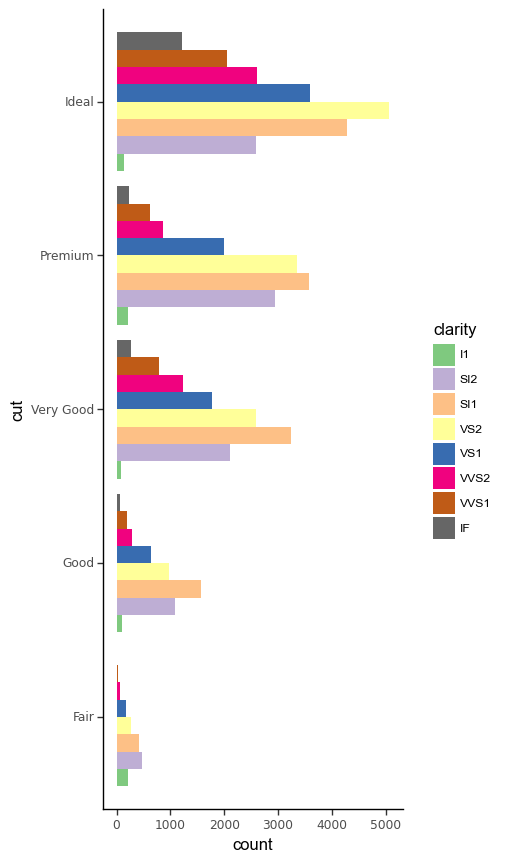

In [6]:
%%time
g = (ggplot(data=diamonds) 
 + geom_bar(mapping=aes(x="cut", fill="clarity"), position="dodge")
 + scale_fill_brewer(palette="Accent", type='qual', direction=1)
 + theme_classic()
 + coord_flip())
g4 = pw.load_ggplot(g, figsize=(3,8))
g4.savefig(quick=quick)

CPU times: user 1.2 s, sys: 3.35 ms, total: 1.21 s
Wall time: 1.2 s


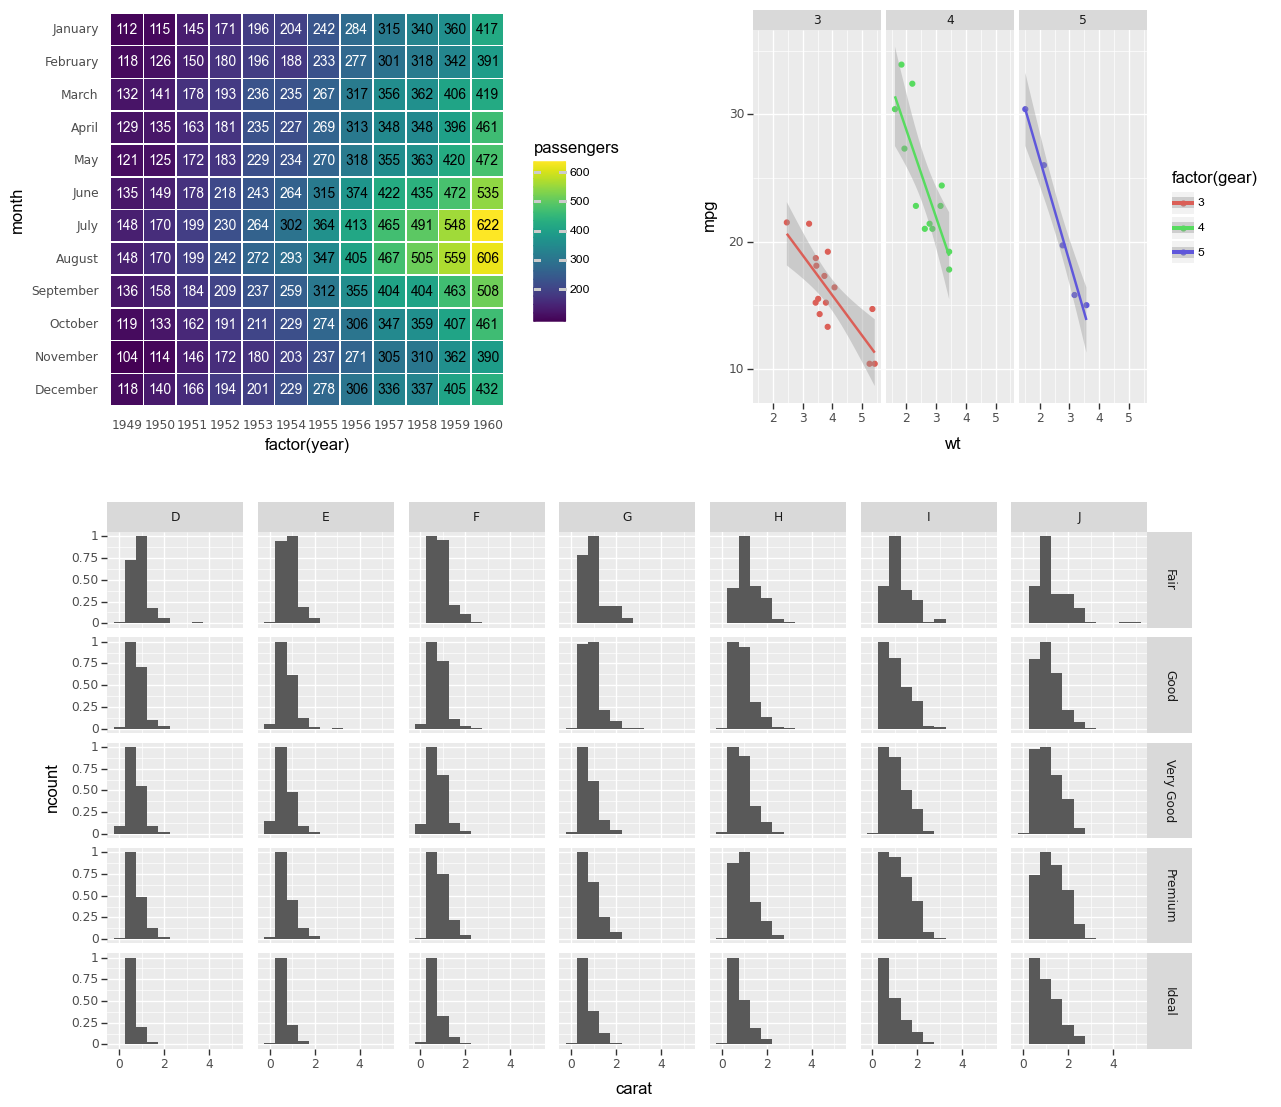

In [7]:
%%time
g123 = (g12)/g3
g123.savefig(quick=quick)

CPU times: user 612 ms, sys: 3.5 ms, total: 615 ms
Wall time: 613 ms


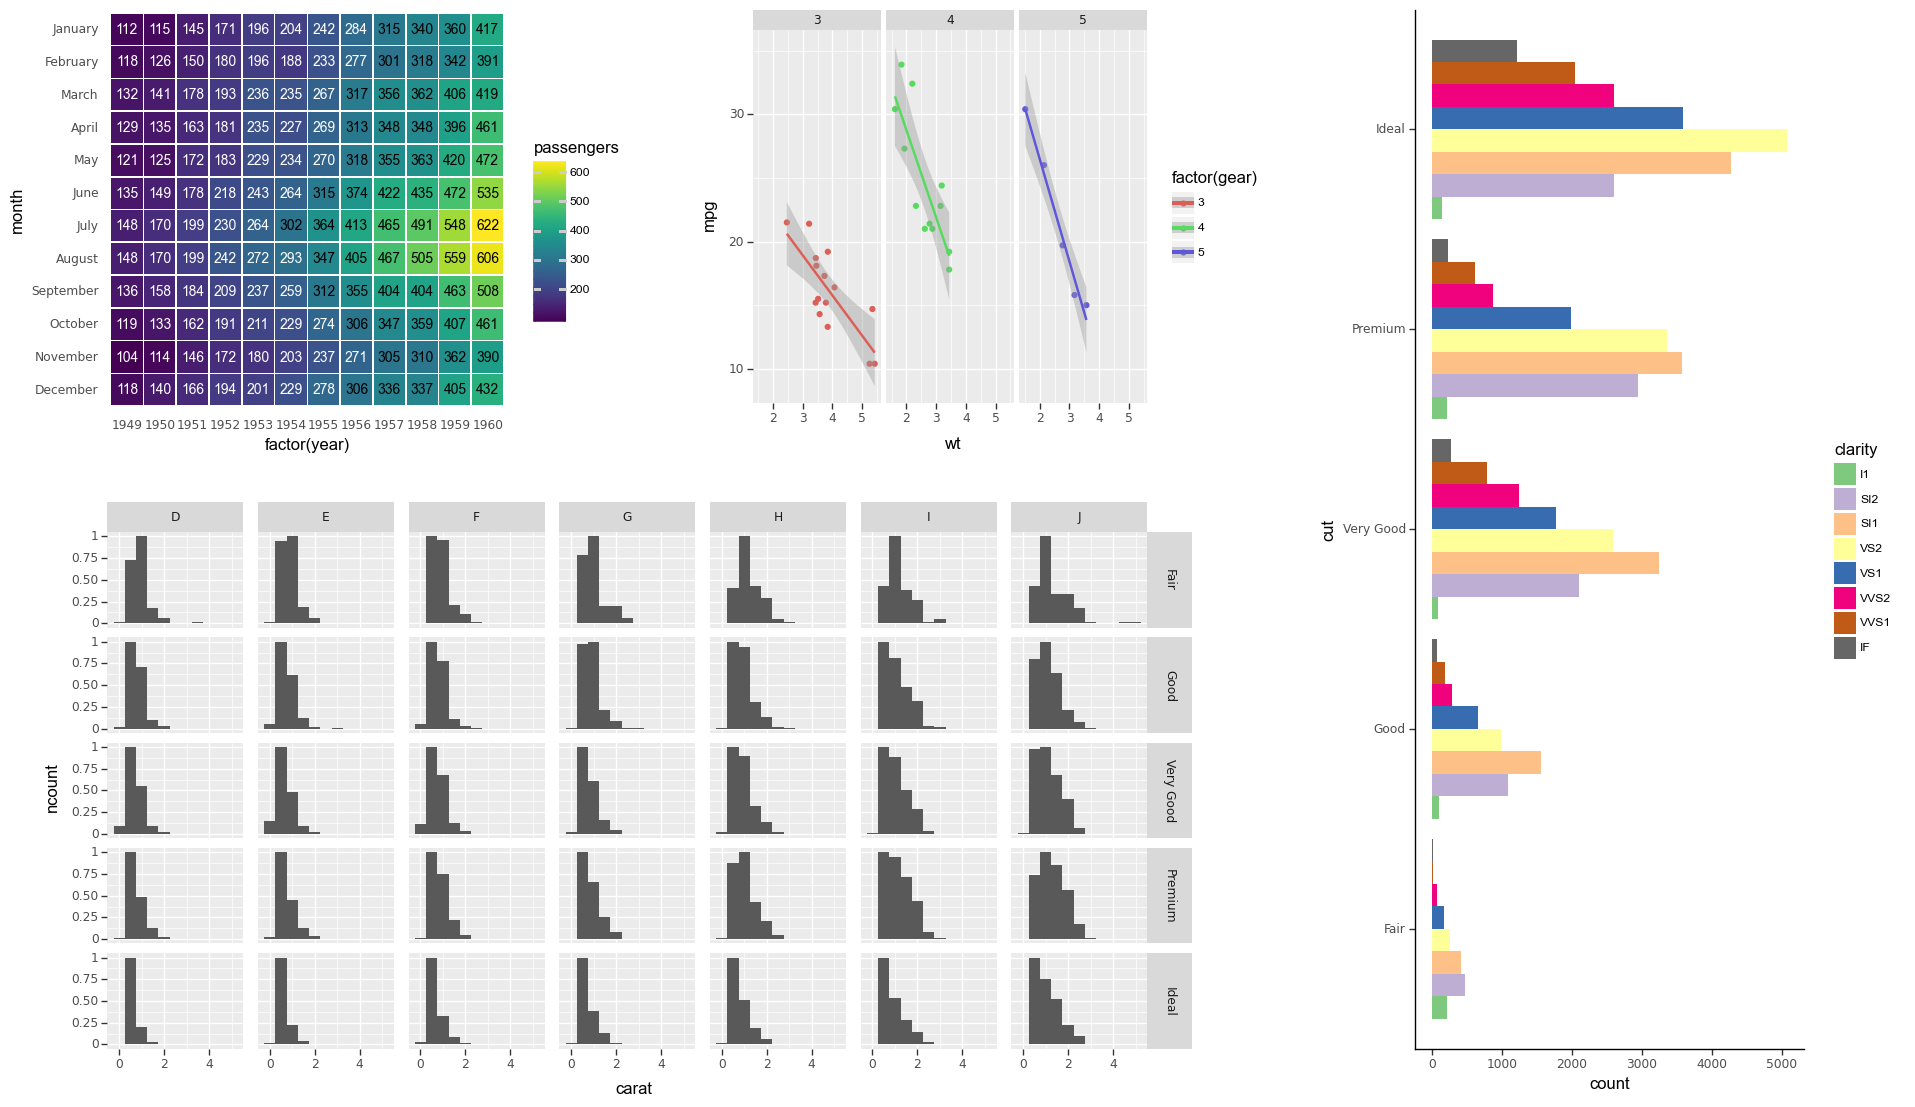

In [8]:
%%time
g1234 = g123|g4
g1234.savefig(quick=quick)